In [1]:
# dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
import time
from citipy import citipy
from scipy.stats import linregress
from datetime import datetime
from config import weather_api_key


url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [2]:
# create random latitude/longitude combinations
lats = np.random.uniform(low=-90.0, high=90.0, size=1500)
lngs = np.random.uniform(low=-180.0, high=180.0, size=1500)
lat_lngs=zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
coordinates[0:3]

[(42.282281746988986, 160.36121806671042),
 (12.316359045367406, 90.55839805380299),
 (69.4636635308112, -102.77087095291463)]

In [5]:
# create a list of cities near the random long/lat points
cities = []
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0],coordinate[1]).city_name
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count
len(cities)

622

In [6]:
# create an empty list to hold the weather data
city_data = []
# Print beginning of the logging
print("Beginning Data Retrieval         ")
print("---------------------------------")

# Create counters
record_count = 1
set_count = 1

Beginning Data Retrieval         
---------------------------------


In [7]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
        
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | severo-kurilsk
Processing Record 2 of Set 1 | port blair
Processing Record 3 of Set 1 | yellowknife
Processing Record 4 of Set 1 | itarema
Processing Record 5 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 6 of Set 1 | dolbeau
City not found. Skipping...
Processing Record 7 of Set 1 | vardo
Processing Record 8 of Set 1 | katsuura
Processing Record 9 of Set 1 | rikitea
Processing Record 10 of Set 1 | jamestown
Processing Record 11 of Set 1 | scottsbluff
Processing Record 12 of Set 1 | koudougou
Processing Record 13 of Set 1 | tres arroyos
Processing Record 14 of Set 1 | hilo
Processing Record 15 of Set 1 | narsaq
Processing Record 16 of Set 1 | opuwo
Processing Record 17 of Set 1 | kaeo
Processing Record 18 of Set 1 | sturgis
Processing Record 19 of Set 1 | marzuq
Processing Record 20 of Set 1 | hermanus
Processing Record 21 of Set 1 | dzhusaly
City not found. Skipping...
Processing Record 22 of Set 1 | albany
Processing Record 23 of

City not found. Skipping...
Processing Record 40 of Set 4 | santa eulalia del rio
City not found. Skipping...
Processing Record 41 of Set 4 | antigonish
Processing Record 42 of Set 4 | grand centre
City not found. Skipping...
Processing Record 43 of Set 4 | barrow
Processing Record 44 of Set 4 | torbay
Processing Record 45 of Set 4 | cabo san lucas
Processing Record 46 of Set 4 | rio gallegos
Processing Record 47 of Set 4 | mackay
Processing Record 48 of Set 4 | palmer
Processing Record 49 of Set 4 | guerrero negro
Processing Record 50 of Set 4 | souillac
Processing Record 1 of Set 5 | sur
Processing Record 2 of Set 5 | makinsk
Processing Record 3 of Set 5 | east london
Processing Record 4 of Set 5 | poum
Processing Record 5 of Set 5 | matiguas
Processing Record 6 of Set 5 | iqaluit
Processing Record 7 of Set 5 | ponta do sol
Processing Record 8 of Set 5 | savonlinna
Processing Record 9 of Set 5 | belushya guba
City not found. Skipping...
Processing Record 10 of Set 5 | cockburn town
P

Processing Record 27 of Set 8 | alexandria
Processing Record 28 of Set 8 | baracoa
Processing Record 29 of Set 8 | taraza
Processing Record 30 of Set 8 | debno
Processing Record 31 of Set 8 | labutta
City not found. Skipping...
Processing Record 32 of Set 8 | gat
Processing Record 33 of Set 8 | grand gaube
Processing Record 34 of Set 8 | thompson
Processing Record 35 of Set 8 | manokwari
Processing Record 36 of Set 8 | bacuit
City not found. Skipping...
Processing Record 37 of Set 8 | kudahuvadhoo
Processing Record 38 of Set 8 | asau
Processing Record 39 of Set 8 | thinadhoo
Processing Record 40 of Set 8 | rawannawi
City not found. Skipping...
Processing Record 41 of Set 8 | mugumu
Processing Record 42 of Set 8 | bursol
City not found. Skipping...
Processing Record 43 of Set 8 | ouadda
Processing Record 44 of Set 8 | otradnoye
Processing Record 45 of Set 8 | ahuimanu
Processing Record 46 of Set 8 | moerai
Processing Record 47 of Set 8 | kenai
Processing Record 48 of Set 8 | mergui
City

Processing Record 12 of Set 12 | salalah
Processing Record 13 of Set 12 | touros
Processing Record 14 of Set 12 | samarai
Processing Record 15 of Set 12 | namie
Processing Record 16 of Set 12 | ndungu
Processing Record 17 of Set 12 | namangan
Processing Record 18 of Set 12 | belaya gora
Processing Record 19 of Set 12 | marsh harbour
Processing Record 20 of Set 12 | pitimbu
Processing Record 21 of Set 12 | pangai
Processing Record 22 of Set 12 | talnakh
Processing Record 23 of Set 12 | vysokogornyy
Processing Record 24 of Set 12 | lazaro cardenas
Processing Record 25 of Set 12 | kloulklubed
Processing Record 26 of Set 12 | tiarei
Processing Record 27 of Set 12 | peniche
Processing Record 28 of Set 12 | ilo
Processing Record 29 of Set 12 | laguna
Processing Record 30 of Set 12 | ler
Processing Record 31 of Set 12 | adrar
Processing Record 32 of Set 12 | kontagora
Processing Record 33 of Set 12 | cervo
Processing Record 34 of Set 12 | ejido hermosillo
Processing Record 35 of Set 12 | bili

In [8]:
len(city_data)

557

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Severo-Kurilsk,50.68,156.12,43.56,78,67,3.49,RU,2020-10-28 22:28:32
1,Port Blair,11.67,92.75,79.66,80,90,2.68,IN,2020-10-28 22:31:48
2,Yellowknife,62.46,-114.35,24.01,96,96,1.01,CA,2020-10-28 22:30:09
3,Itarema,-2.92,-39.92,78.60,81,2,14.54,BR,2020-10-28 22:31:48
4,Vardo,70.37,31.11,39.79,79,85,15.88,NO,2020-10-28 22:31:48


In [10]:
import time
today = time.time()
today

1603924351.0084014

In [11]:
# extract relevant fields from the dataframe for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

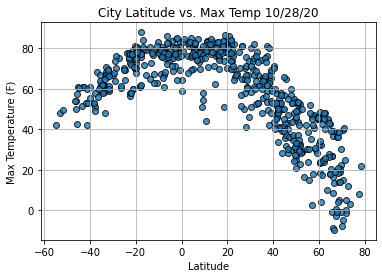

In [12]:
# build scatter plot, lat vs max temp
plt.scatter(lats,
           max_temps,
           edgecolor="black",linewidths=1,marker="o",
           alpha=0.8, label="Cities")
plt.title(f'City Latitude vs. Max Temp ' + time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()
          

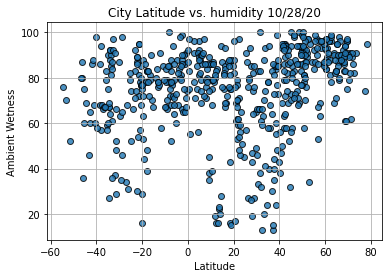

In [13]:
# build scatter plot, lat vs max humidity
plt.scatter(lats,
           humidity,
           edgecolor="black",linewidths=1,marker="o",
           alpha=0.8, label="Cities")
plt.title(f'City Latitude vs. humidity ' + time.strftime("%x"))
plt.ylabel("Ambient Wetness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

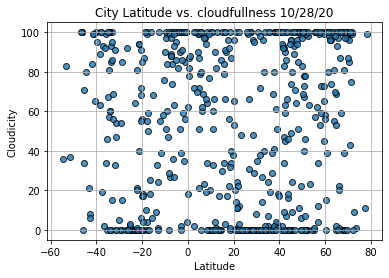

In [14]:
# build scatter plot, lat vs max cloudicity
plt.scatter(lats,
           cloudiness,
           edgecolor="black",linewidths=1,marker="o",
           alpha=0.8, label="Cities")
plt.title(f'City Latitude vs. cloudfullness ' + time.strftime("%x"))
plt.ylabel("Cloudicity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

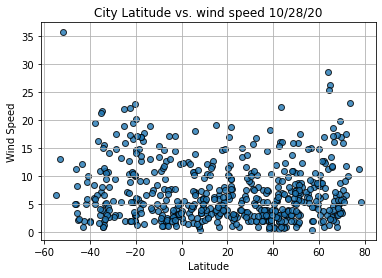

In [15]:
# build scatter plot, lat vs wind speed
plt.scatter(lats,
           wind_speed,
           edgecolor="black",linewidths=1,marker="o",
           alpha=0.8, label="Cities")
plt.title(f'City Latitude vs. wind speed ' + time.strftime("%x"))
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [49]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    title = title + '\n R-value = ' + str(round(r_value,2))
    plt.title(title)
    plt.show()

In [26]:
# create northern and southern hemisphere dataframes
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] <= 0]

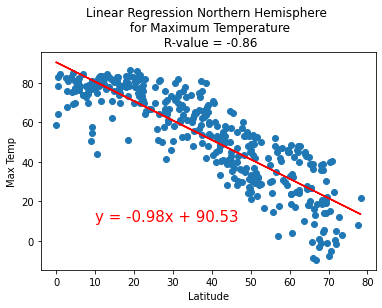

In [50]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression Northern Hemisphere \n for Maximum Temperature','Max Temp',(10,10))


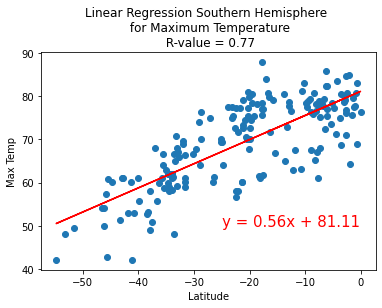

In [51]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression Southern Hemisphere \n for Maximum Temperature','Max Temp',(-25,50))


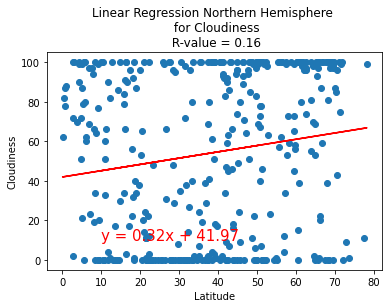

In [52]:
# Linear regression on % cloudiness in northern hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression Northern Hemisphere \n for Cloudiness',
                       'Cloudiness',(10,10))

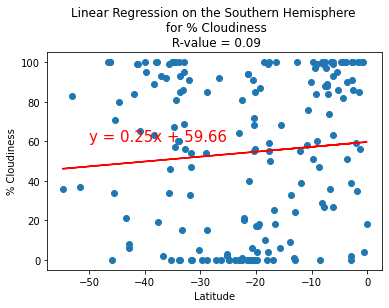

In [53]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness',
                       '% Cloudiness',(-50,60))

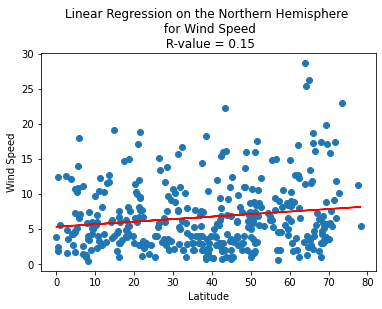

In [58]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 
                       'Wind Speed',(30,35))

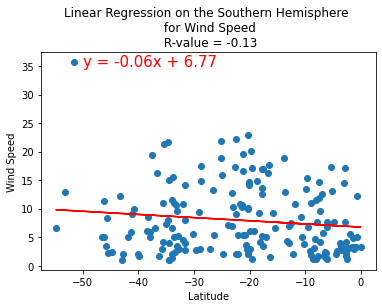

In [57]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 
                       'Wind Speed',(-50,35))